# <font color=blue>Assignment</font>

In this assignment, you will measure the performance of the model you created with the Titanic data in the previous lesson. To complete this assignment, send a link to a Jupyter notebook containing solutions to the following tasks.

Evaluate the performance of your model with the metrics you have learned in this course.
Plot the ROC and the precision / recall curves for different "c" values.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [19]:
titanic=pd.read_csv('titanic.csv')
titanic.drop(columns='Unnamed: 0',inplace=True)

In [20]:
#Target Feature is `Survived column. Since this is categorical variable, I can apply logistic regression.
Y= titanic['Survived']

#Independent Variables without dytpe object
X=titanic.loc[:,titanic.describe(exclude='O').columns].drop(columns='Survived')

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=1111)

In [28]:
lr=LogisticRegression(C=10000,solver='lbfgs', multi_class="ovr")

In [29]:
lr.fit(X_train,Y_train)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
train_prediction=lr.predict(X_train)

In [34]:
test_prediction=lr.predict(X_test)

In [44]:
#Confusion Matrix:
from sklearn.metrics import confusion_matrix
confusion_matrix_test = confusion_matrix(Y_test, test_prediction)

In [43]:
print("\n\nConfusion Matrix (Test Data)", "-"*30, confusion_matrix_test, sep="\n")



Confusion Matrix (Test Data)
------------------------------
[[90 11]
 [24 54]]


In [37]:
TN = confusion_matrix_test[0][0]
TP = confusion_matrix_test[1][1]
FN = confusion_matrix_test[1][0]
FP = confusion_matrix_test[0][1]

print("True negative amount  :", TN)
print("True positive amount  :", TP)
print("False positive amount :", FP)
print("False negative amount :", FN)

True negative amount  : 90
True positive amount  : 54
False positive amount : 11
False negative amount : 24


|Evaluation|Ground truth|Predicted|Description|
|-|-|-|-|
|**True Negative**| 0 |0|Passenger had not been survived and predicted as not Survived |
|**False Negative**| 1 |0|Passenger had been survived and predicted as not Survived  |
|**False Positive**| 0 |1|Passenger had not been survived and predicted as Survived |
|**True Positive**| 1 |1|Passenger had been survived and predicted as Survived |
   


In [39]:
#Accuracy:
from sklearn.metrics import accuracy_score

print("Accuracy_score() value        : ", accuracy_score(Y_test, test_prediction))

accuracy_score() value        :  0.8044692737430168


In [40]:
print("Error_rate () value        : ", 1- accuracy_score(Y_test, test_prediction))

accuracy_score() value        :  0.1955307262569832


In [45]:
from sklearn.metrics import precision_score
print("Precision score() value        : ", precision_score(Y_test, test_prediction))

precision score() value        :  0.8307692307692308


In [46]:
from sklearn.metrics import recall_score
print("Recall/Sensitivity score() value        : ", recall_score(Y_test, test_prediction))

recall score() value        :  0.6923076923076923


In [47]:
print("Specificity score() value        : ", TN/(TN+FP))

Specificity score() value        :  0.8910891089108911


In [48]:
from sklearn.metrics import f1_score
print("F1 score() value        : ", f1_score(Y_test, test_prediction))

F1 score() value        :  0.7552447552447553


In [49]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(Y_test, test_prediction))

metrics = precision_recall_fscore_support(Y_test, test_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       101
           1       0.83      0.69      0.76        78

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.80      0.80       179

Precision  : [0.78947368 0.83076923]
Recall     : [0.89108911 0.69230769]
F1 Score   : [0.8372093  0.75524476]


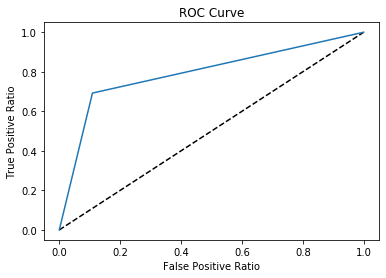

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(Y_test, test_prediction)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)

plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')

plt.show()

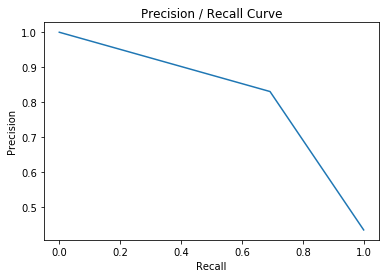

In [52]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(Y_test, test_prediction)

plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision / Recall Curve')

plt.show()